<h1>Image Color Palette Extraction using K-Means Clustering</h1>


#0c3f6f


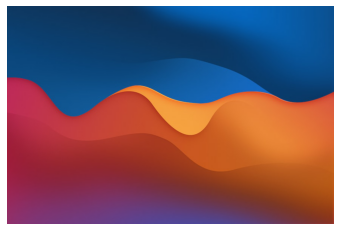

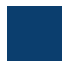

#e67e36


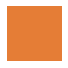

#933031


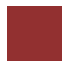

#c04a2e


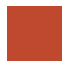

#70396e


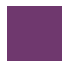

#0c599f


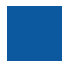

In [3]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from imageio import imread # It is a python library that provides an easy interface to read and write a wide range of image data
from skimage.transform import resize # Resize image to match a certain size
from sklearn.cluster import KMeans
from matplotlib.colors import to_hex # To print the hexadecimal code for the color 

# Fix random seed
np.random.seed(0)

# Read image file as 2-D array of RGB values from the provided URL
filepath = 'https://images.unsplash.com/photo-1687042277586-971369d3d241?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=870&q=80'
img = imread(filepath)

# Show the original image
plt.axis('off')
plt.imshow(img);

# Resize the image to a smaller size (200x200 pixels)
img = resize(img, (200, 200))

# Convert the image data to a Pandas DataFrame for processing
data = pd.DataFrame(img.reshape(-1, 3), columns=['R', 'G', 'B'])

# Perform K-Means clustering to identify dominant colors
kmeans = KMeans(n_clusters=6, random_state=0)

# Fit and assign clusters
data['Cluster'] = kmeans.fit_predict(data)

# Get the cluster centers (representing the dominant colors)
palette = kmeans.cluster_centers_

# Convert data to a format accepted by imshow
palette_list = list()
for color in palette:
    palette_list.append([[tuple(color)]])

# Show the color palette with the dominant colors and their hexadecimal codes
for color in palette_list:
    print(to_hex(color[0][0]))
    plt.figure(figsize=(1, 1))
    plt.axis('off')
    plt.imshow(color)
    plt.show()

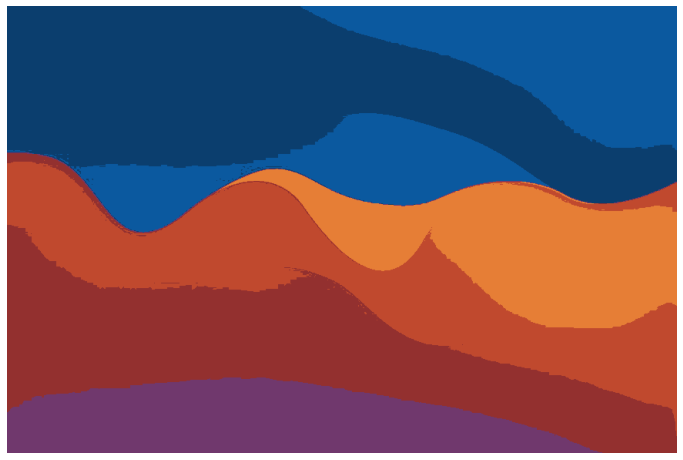

In [5]:
from PIL import Image
import requests
from io import BytesIO

# Load the image from its URL
url = "https://images.unsplash.com/photo-1687042277586-971369d3d241?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=870&q=80"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Convert image to a numpy array and normalize the pixel values
a = np.asarray(img, dtype=np.float32) / 255

# Reshape the array
x, y, z = a.shape
a1 = a.reshape(x * y, z)

# Apply K-Means clustering
k_means = KMeans(n_clusters=6)
k_means.fit(a1)

# Get the cluster centers (representing the dominant colors)
palette = k_means.cluster_centers_
labels = k_means.labels_

# Reconstruct the image matrix using the dominant colors
a2 = palette[labels]
a3 = a2.reshape(x, y, z)

# Display the reconstructed image
plt.figure(figsize=(12, 12))
plt.imshow(a3)
plt.axis('off')
plt.show()